<div style="padding:15px 20px 20px 20px;border-left:3px solid #87CEFA;background-color:#f0fbff;border-radius: 20px;color:#424242;">

# Notebook Description

## Table of Contents
- **1. Setup**
    - 1.1) Local Setup
    - 1.2) Downloading the Data

- **2. Channel Dataset Analysis**
    - 2.1) 
    - 2.2) 

- **3. Time Series Dataset Analysis**
    - 3.1) Example of Time Series Data: The evolution of some famous channels
    - 3.2) 

- **4. Video Metadata Dataset Analysis**
    - 4.1) 
    - 4.2) 

- **5. Comment Dataset Analysis**
    - 5.1) 
    - 5.2) 

- **6. Ideas we would like to explore** 

</div>

# 1. Setup

## 1.1) Local Setup

In [ ]:
# !pip install -r pip_requirements.txt

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils

In [3]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

## 1.2) Downloading the Data

In [4]:
# Download the datasets (ordered by size), comment out the ones you don't need 
datasets = [
    # ("https://zenodo.org/records/4650046/files/_raw_df_channels.tsv.gz?download=1", "channels.tsv.gz"), # 6.0 MB
    # ("https://zenodo.org/records/4650046/files/_raw_df_timeseries.tsv.gz?download=1", "time_series.tsv.gz" ), # 571.1 MB
    # ("https://zenodo.org/records/4650046/files/num_comments.tsv.gz?download=1", "num_comments.tsv.gz"), # 754.6 MB
    # ("https://zenodo.org/records/4650046/files/num_comments_authors.tsv.gz?download=1", "num_comments_authors.tsv.gz"), # 1.4 GB
    # ("https://zenodo.org/records/4650046/files/yt_metadata_en.jsonl.gz?download=1", "yt_metadata.jsonl.gz"), # 13.6 GB
    # ("https://zenodo.org/records/4650046/files/youtube_comments.tsv.gz?download=1", "youtube_comments.tsv.gz") # 77.2 GB
]

data_utils.get_data(datasets)

# 2. Channel Dataset Analysis

In [5]:
df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
df_channels.head(3)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087


In [6]:
# For each category, save the channels in a separate file 
data_utils.save_data_grouped_by_category(df_channels, 
                                         column="category_cc", 
                                         output_dir=CHANNELS_PATH, 
                                         overwrite=True, 
                                         verbose=False)

Displaying statistics to study the YouTube channels in the category: Music

The category Music consists of 24285 channels.
The DataFrame occupies 5.51 MB.


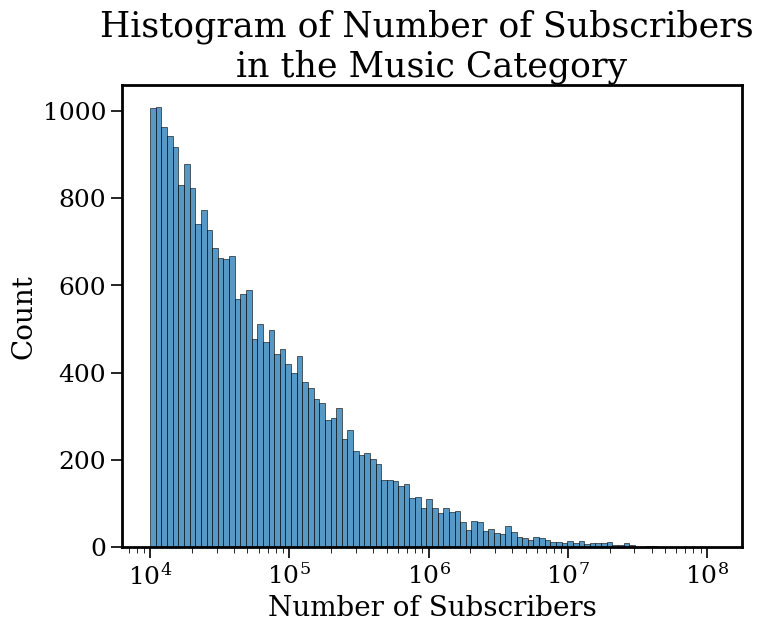

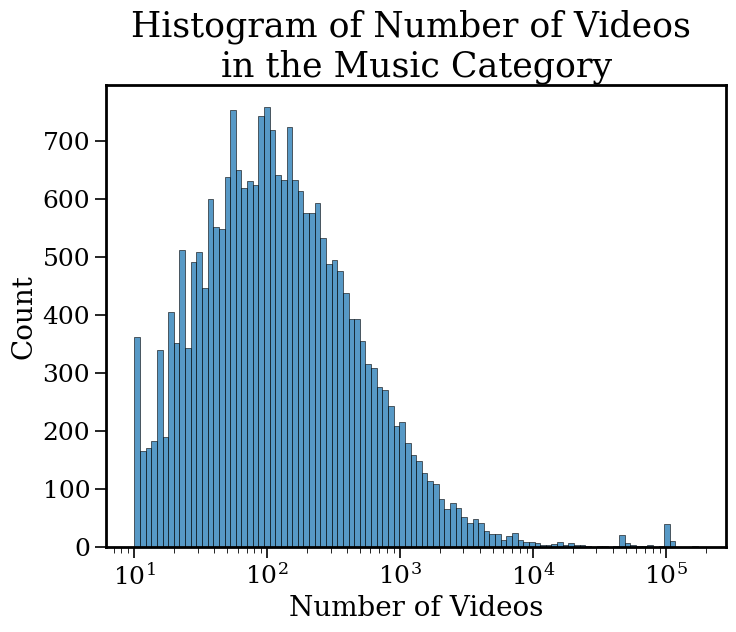

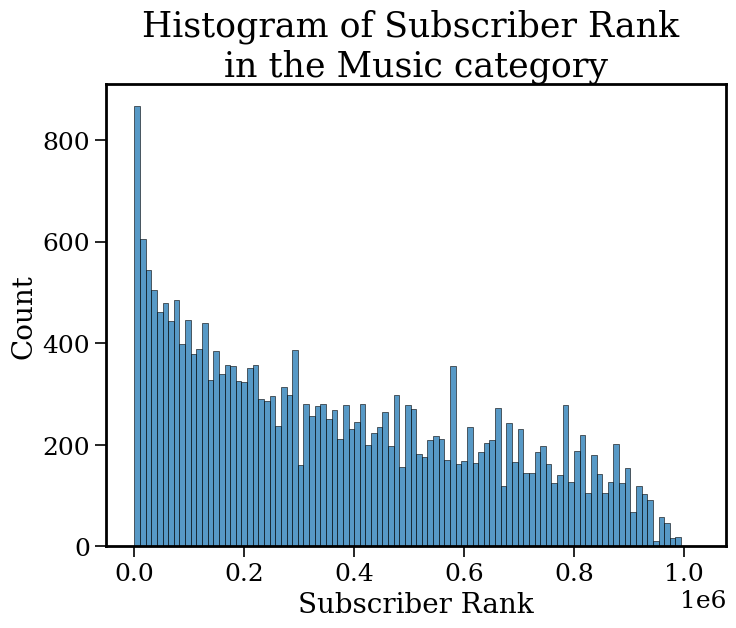

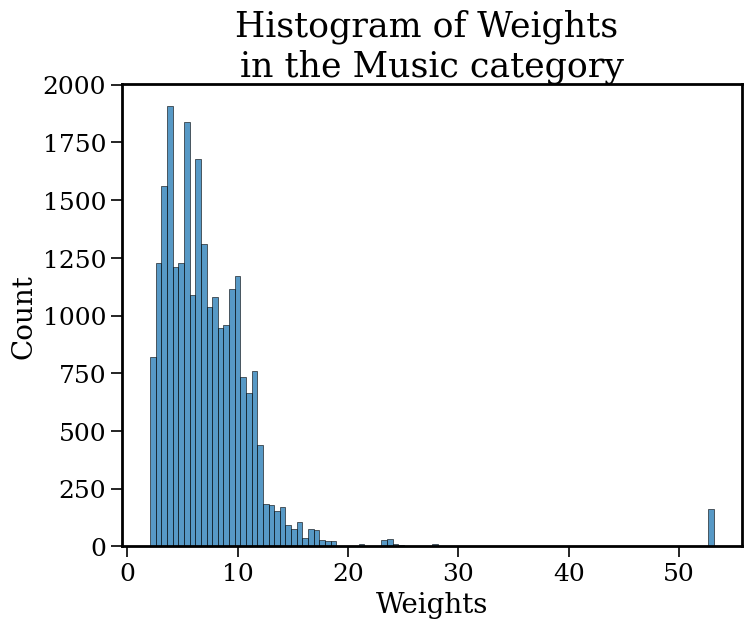

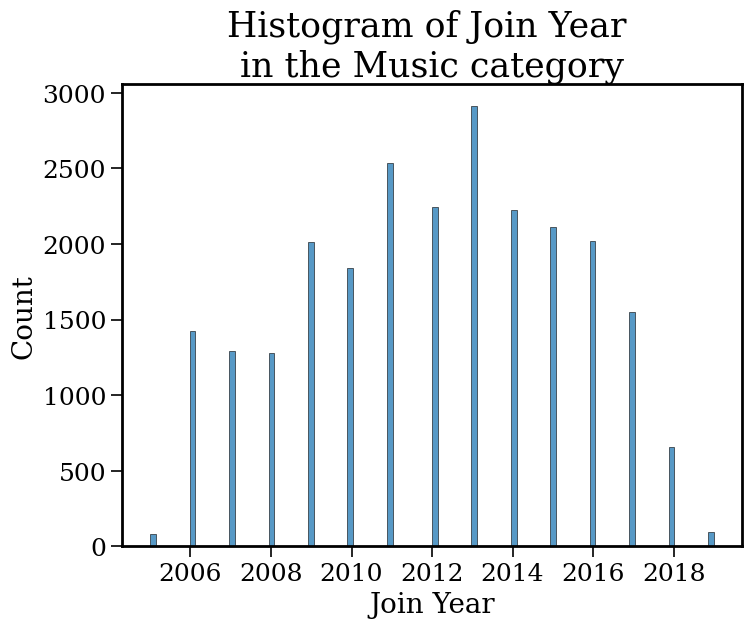

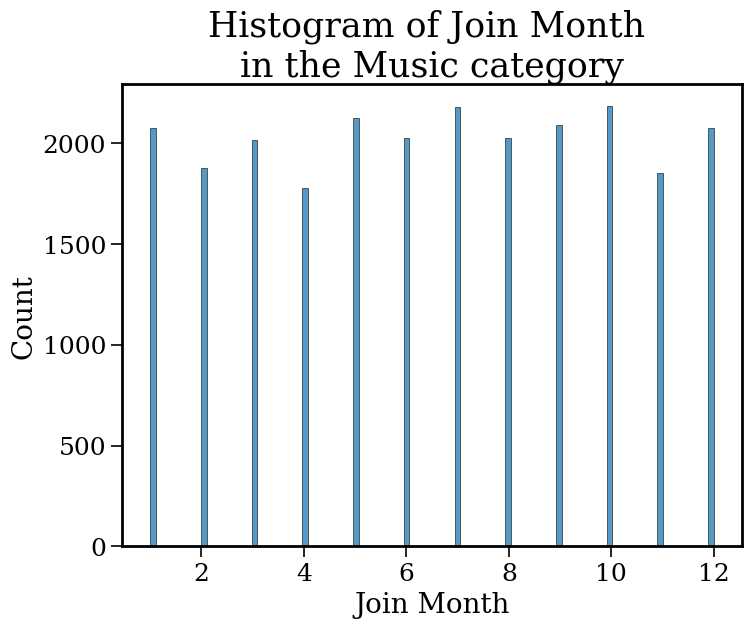

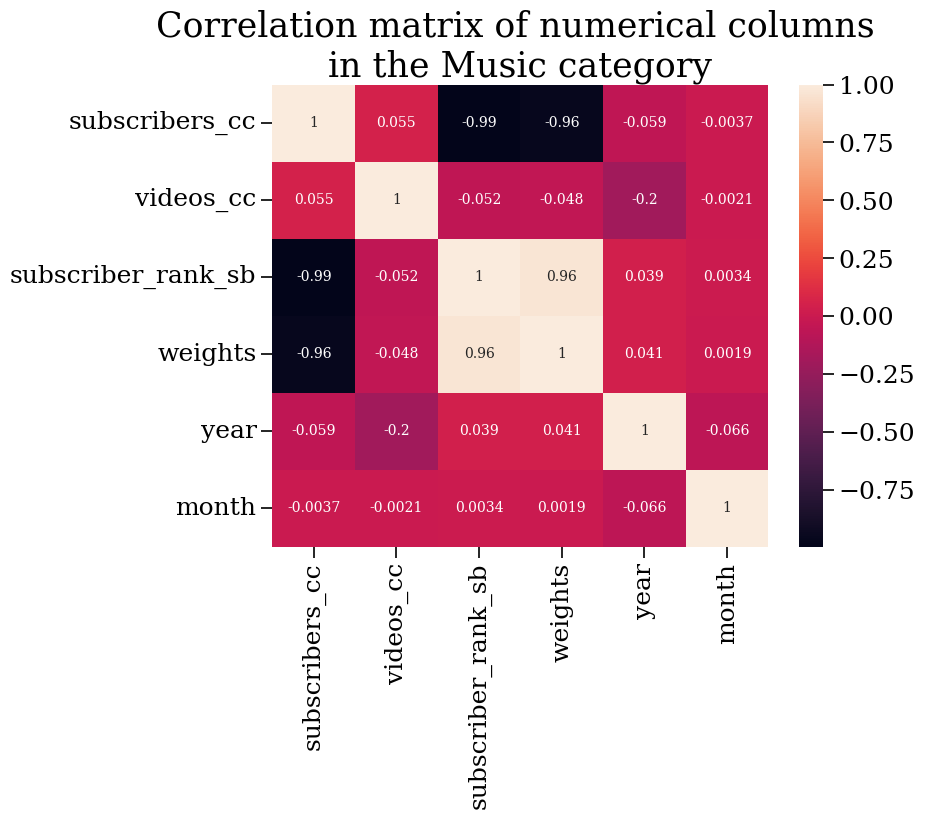

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
join_date,datetime64[ns],24285,2012-07-19 12:41:53.551575040,NaN,2005-06-25 00:00:00,2009-12-23 00:00:00,2012-09-29 00:00:00,2015-03-04 00:00:00,2019-08-15 00:00:00,0,0.000000
subscribers_cc,int32,24285.0,292134.635948,1600659.370285,10000.0,18200.0,39600.0,127167.0,112139463.0,0,0.000000
videos_cc,int32,24285.0,666.219518,5506.17201,10.0,47.0,113.0,300.0,175300.0,0,0.000000
subscriber_rank_sb,float32,24285.0,366227.21875,271077.125,13.0,124802.0,318630.0,582120.0,1025119.0,0,0.000000
weights,float32,24285.0,7.420398,5.131663,2.087,4.3735,6.5675,9.436,53.143501,0,0.000000
category_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
channel,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
name_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.008236


In [7]:
category = "Music"
df_channel_music = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_channel_music = data_utils.cast_df(df_channel_music, type='channel')

data_utils.get_stats_on_category(df_channel_music,
                                 type='channel', 
                                 category_name=category, 
                                 corr_method='spearman', 
                                 verbose=False)

# 3. Time Series Dataset Analysis

In [8]:
df_time_series = pd.read_csv(f"{DATA_PATH}/time_series.tsv.gz", sep="\t", compression="gzip")
df_time_series.head(3)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,394085.666667,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,835393.750000,441308.083333,1501.500000,455.500000,6,0,1


In [9]:
# For each category, save the time series in a separate file
data_utils.save_data_grouped_by_category(df_time_series, 
                                         column="category", 
                                         output_dir=TIME_SERIES_PATH,
                                         overwrite=False, 
                                         verbose=False)

## 3.1) Example of Time Series Data: The evolution of some famous channels

Let's focus on the `Music` category and particular channels. First, since we only have access to the channel ids (via the `channel` column), we need to merge the channel ids with the channel names available in the `df_channels` dataset under the `name_cc` column.

In [10]:
category = "Music"

# Load the Music time series
df_music_time_series = pd.read_csv(f"{TIME_SERIES_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_time_series = data_utils.cast_df(df_music_time_series, type='time_series')

# Load the Music channels
df_music_channels = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_channels = data_utils.cast_df(df_music_channels, type='channel')

# Add the channel names to the time series dataset by merging the two datasets
df_music_time_series = data_utils.merge_channel_name(df_music_time_series, df_music_channels, subscriber_rank=True)

In [11]:
df_music_time_series[["channel", "name_cc", "delta_views"]].sample(3)

,channel,name_cc,delta_views
825881,UCohllq0Pk5lQuuNANabHKcg,PPF,96790.000000
1676764,UCqy2qpZbLbkQ6X-cSEb6-fg,Various Artists - To...,85783.155556
1662793,UCKwLrLZXaIBeEBFj9nBc4Vw,IN RADIX,34511.017895


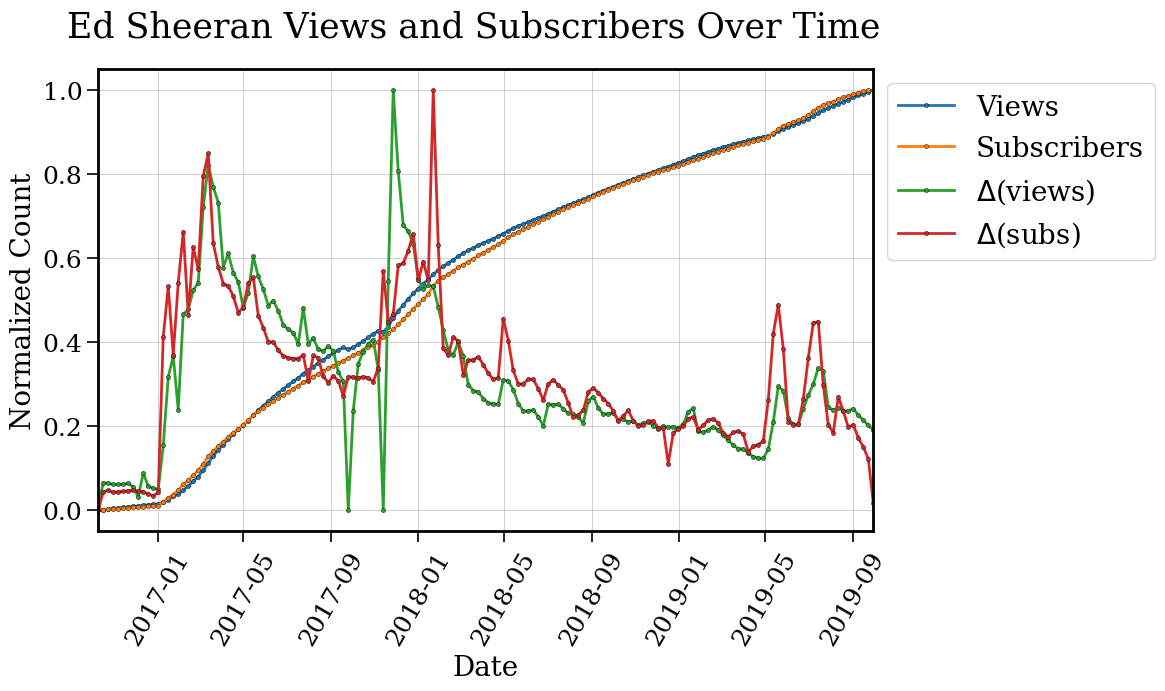

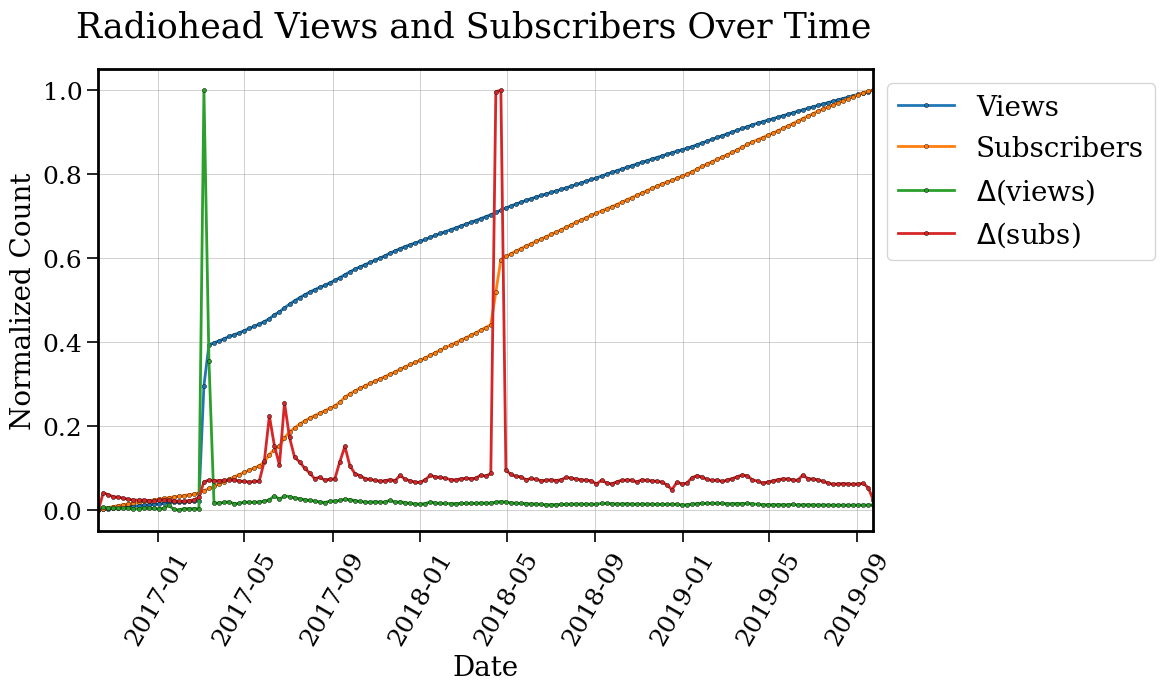

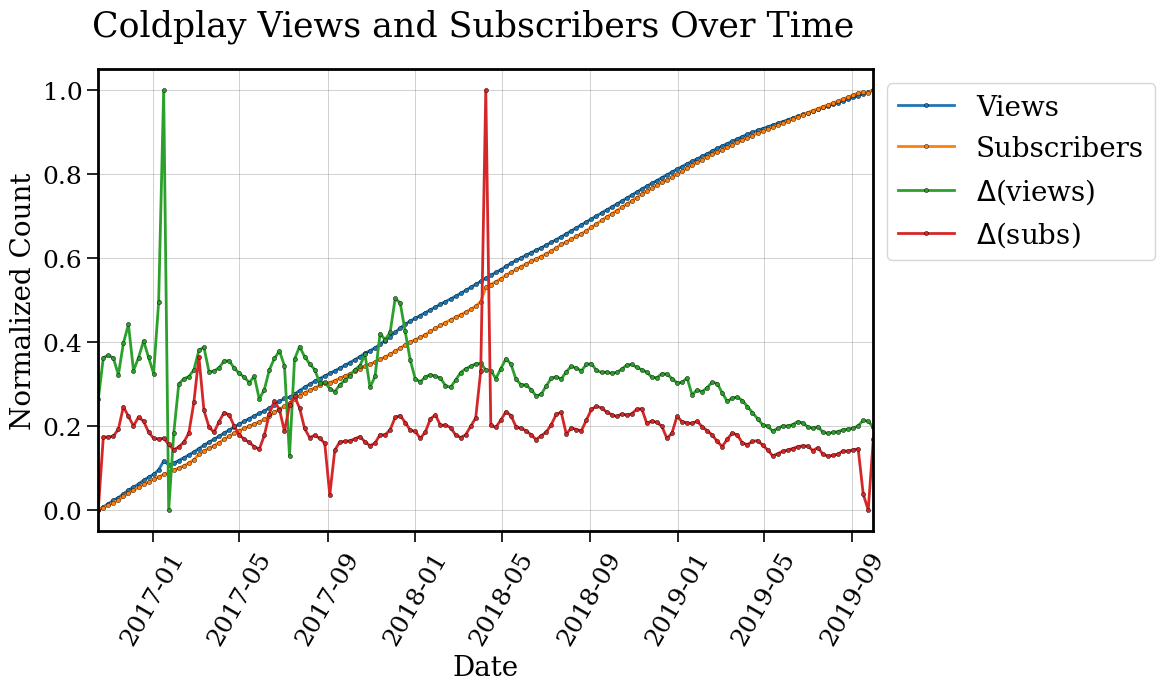

In [12]:
# Here we use normalized data to compare the evolution trend of different channels (not the specific values)
channel_names = ["Ed Sheeran", "Radiohead", "Coldplay"]
for channel_name in channel_names:
    data_utils.plot_channel_time_series(df=df_music_time_series,
                                        channel_name=channel_name,
                                        datetime_col="datetime",
                                        quantities_to_plot=["views", "subs", "delta_views", "delta_subs"],
                                        normalize=True,
                                        palette="tab10",
                                        markers=["."],
                                        title=f"{channel_name} Views and Subscribers Over Time")

## 3.2) Various distributions of the time series data

Let's plot the distribution of the `delta_views`, `delta_subs`, and `delta_videos` columns for the `Music` category.

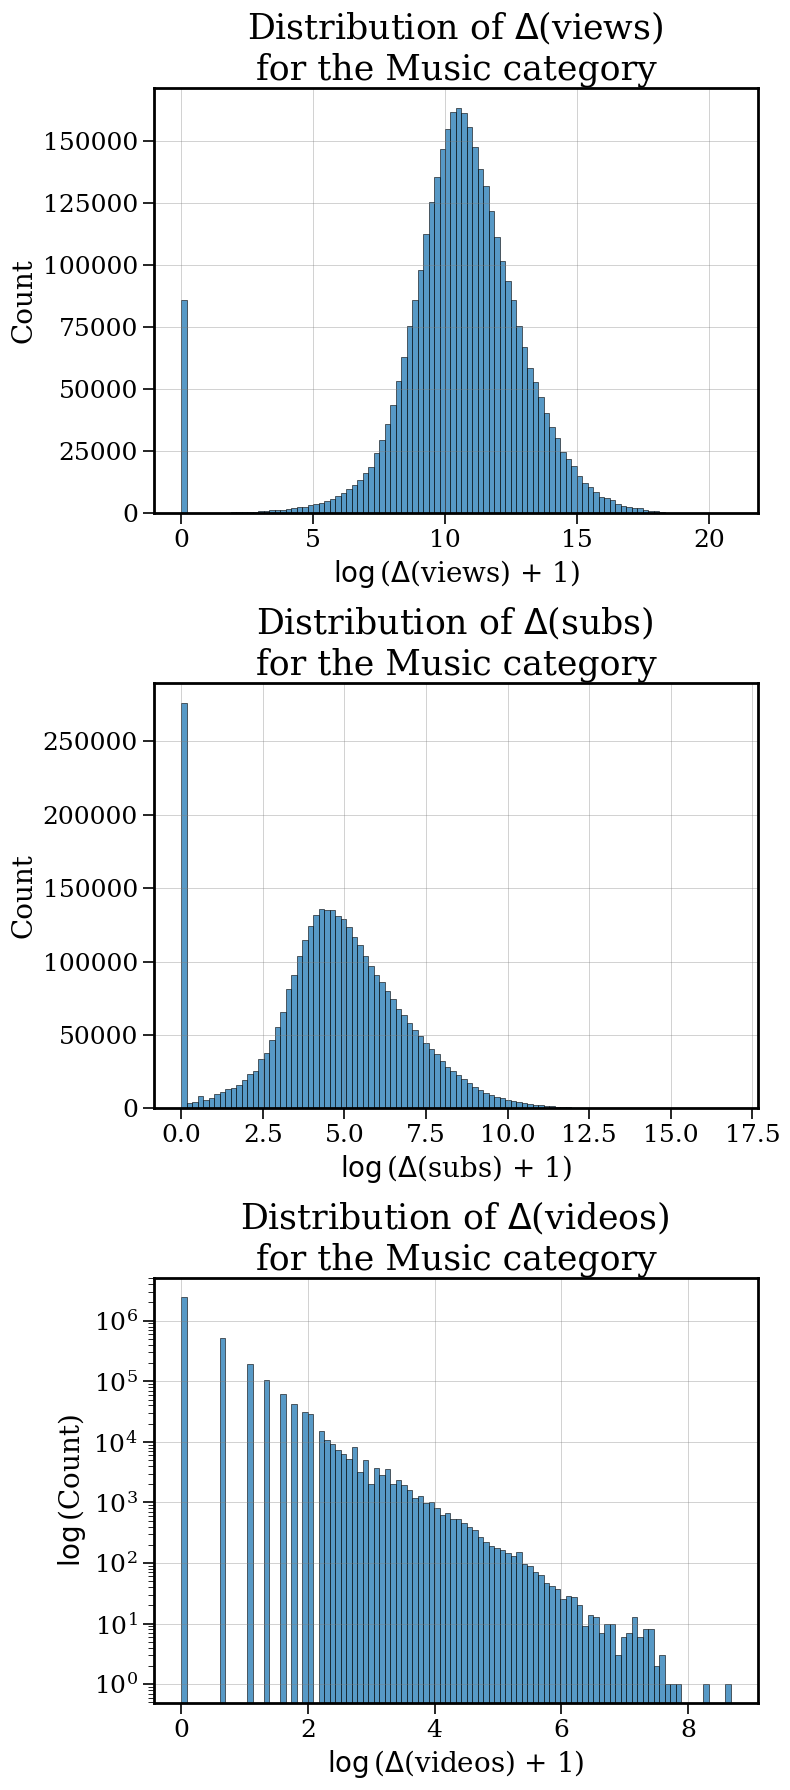

Summary statistics for the ['delta_views', 'delta_subs', 'delta_videos']:
        delta_views    delta_subs  delta_videos
count  3.532411e+06  3.532411e+06  3.532411e+06
mean   5.024186e+05  1.454334e+03  1.250262e+00
std    4.831397e+06  3.365696e+04  1.012890e+01
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    1.270412e+04  3.530556e+01  0.000000e+00
50%    4.314738e+04  1.158889e+02  0.000000e+00
75%    1.612692e+05  4.414583e+02  1.000000e+00
max    1.104146e+09  2.053974e+07  5.859000e+03


In [13]:
data_utils.plot_category_distribution(df=df_music_time_series,
                                      columns=["delta_views", "delta_subs", "delta_videos"],
                                      category="Music",
                                      x_logs=[True, True, True],
                                      y_logs=[False, False, True],
                                      kind="hist",
                                      print_summary=True)

Something that might be more interesting is to compare these distributions accross different categories. Let's plot the `delta_views` and `delta_subs` distributions for the `Music`, `Entertainment`, `Gaming`, and `News & Politics` categories.

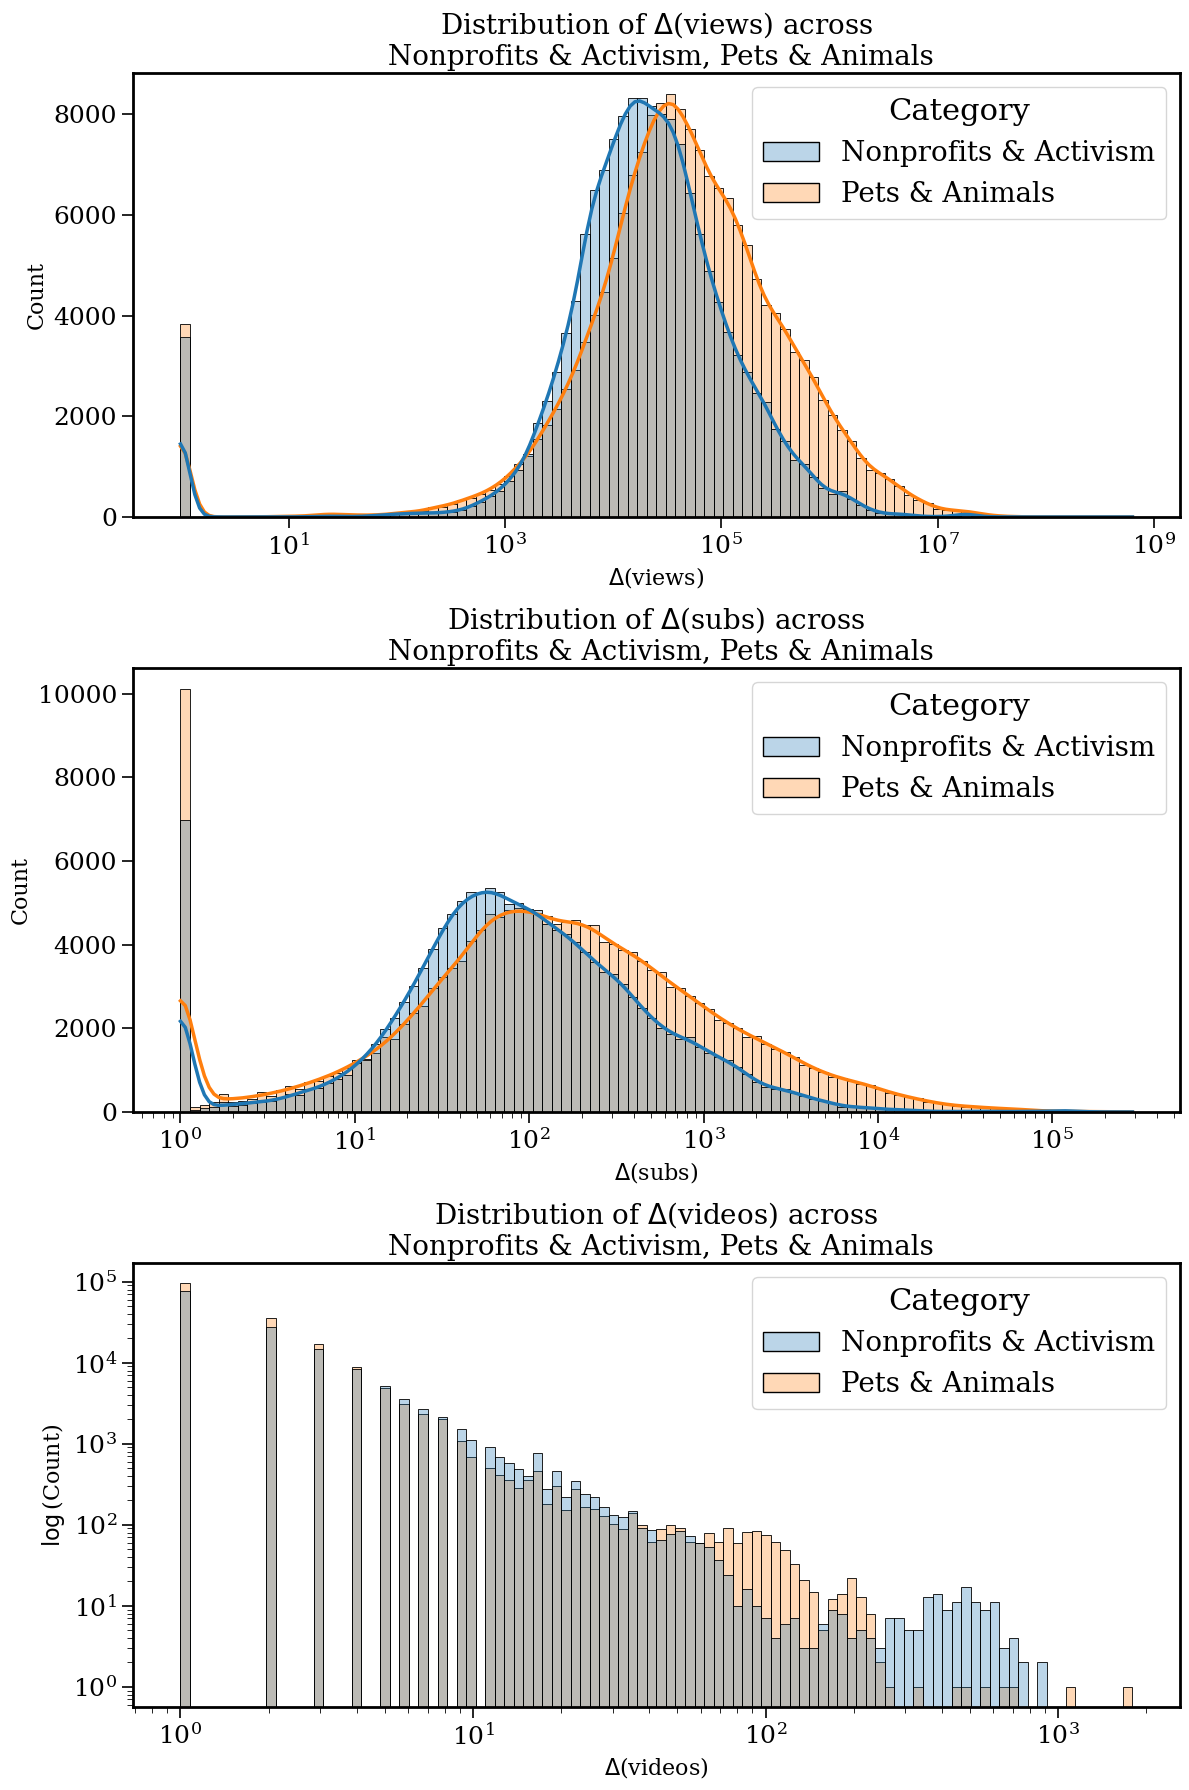

In [46]:
categories = ["Nonprofits & Activism", "Pets & Animals"]
data_utils.compare_distribution_across_categories(df_time_series,
                                                  columns=["delta_views", "delta_subs", "delta_videos"],
                                                  hue="category",
                                                  categories=categories,
                                                  x_logs=[True, True, True],
                                                  y_logs=[False, False, True],
                                                  kind="hist")

# 4. Video Metadata Dataset Analysis

In [47]:
# # Process the metadata file by saving each category in a separate file
# data_utils.process_metadata(f"{DATA_PATH}/yt_metadata.jsonl.gz",
#                             column_to_group="categories",
#                             chunk_size=10_000,
#                             output_dir=VIDEO_METADATA_PATH, 
#                             overwrite=False, 
#                             verbose=True)

In [48]:
category = "Music"
df_metadata_music = pd.read_parquet(f"{VIDEO_METADATA_PATH}/{category}.parquet")
df_metadata_music = data_utils.cast_df(df_metadata_music, type='video_metadata')

Displaying statistics to study the YouTube videos in the category: music

The category music consists of 8305003 videos.
The DataFrame occupies 14570.41 MB.


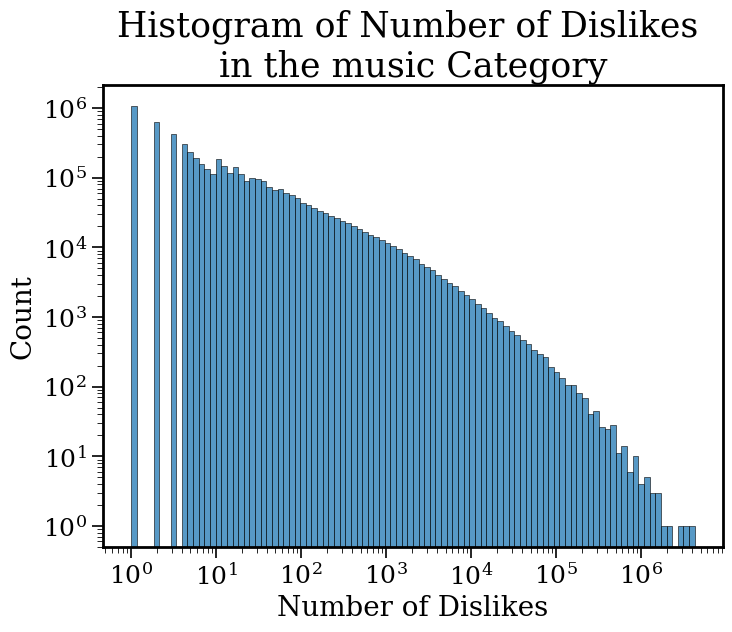

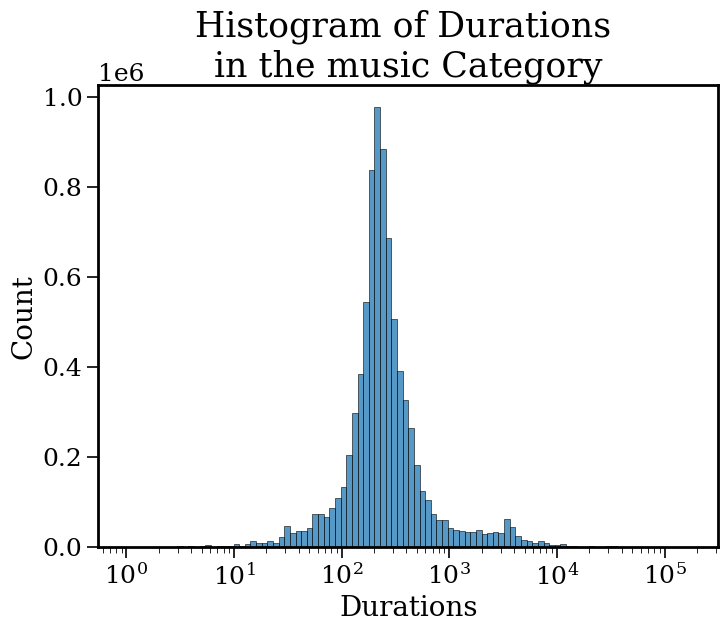

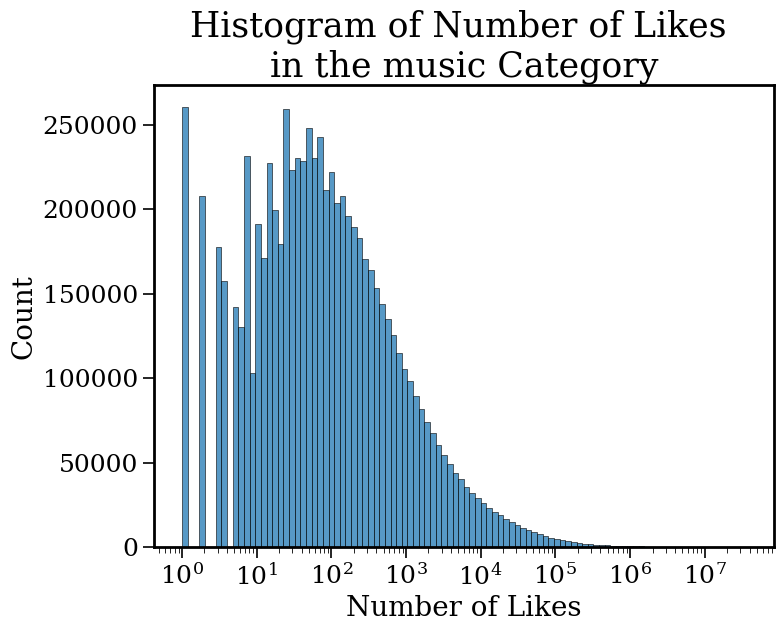

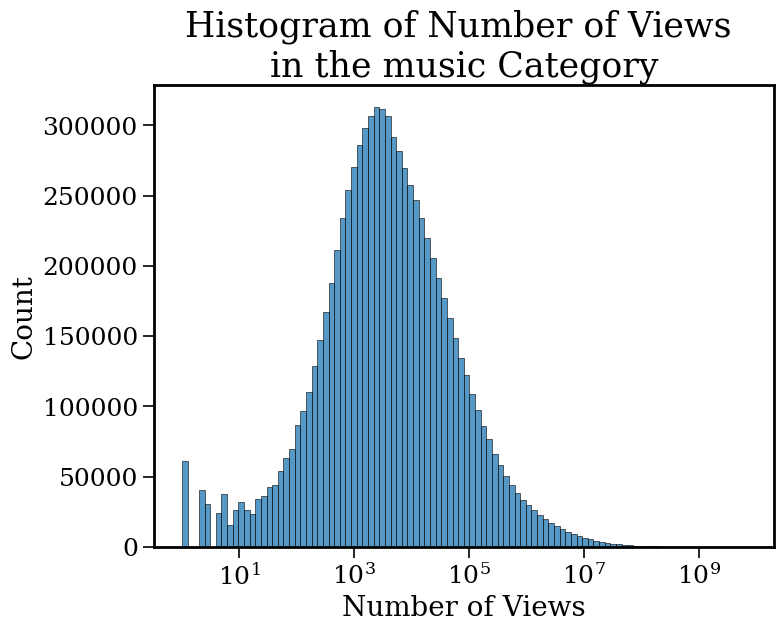

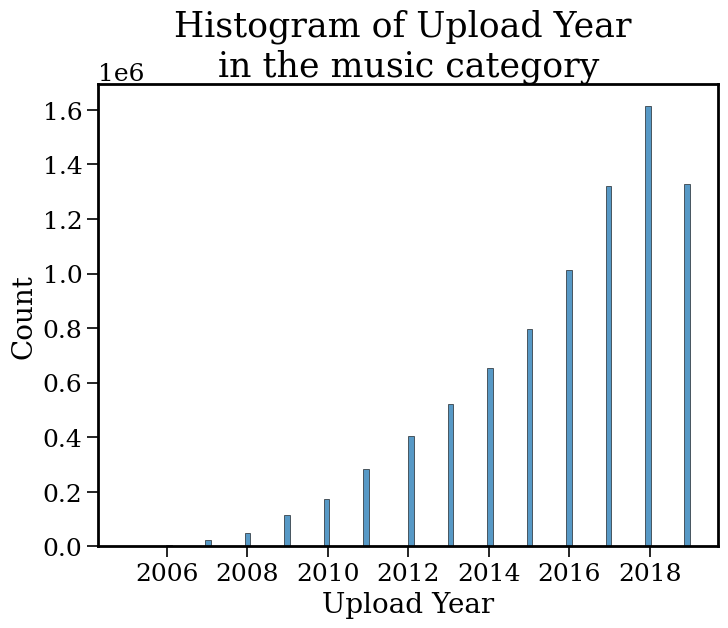

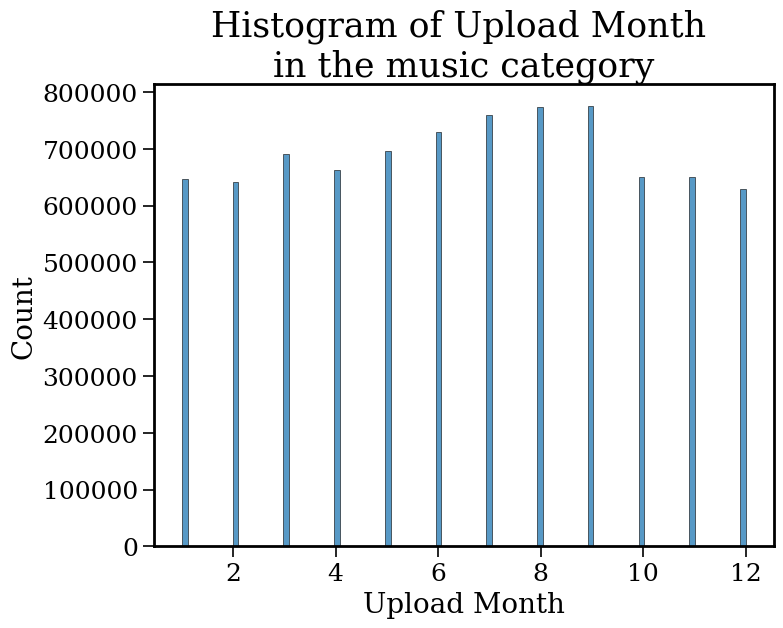

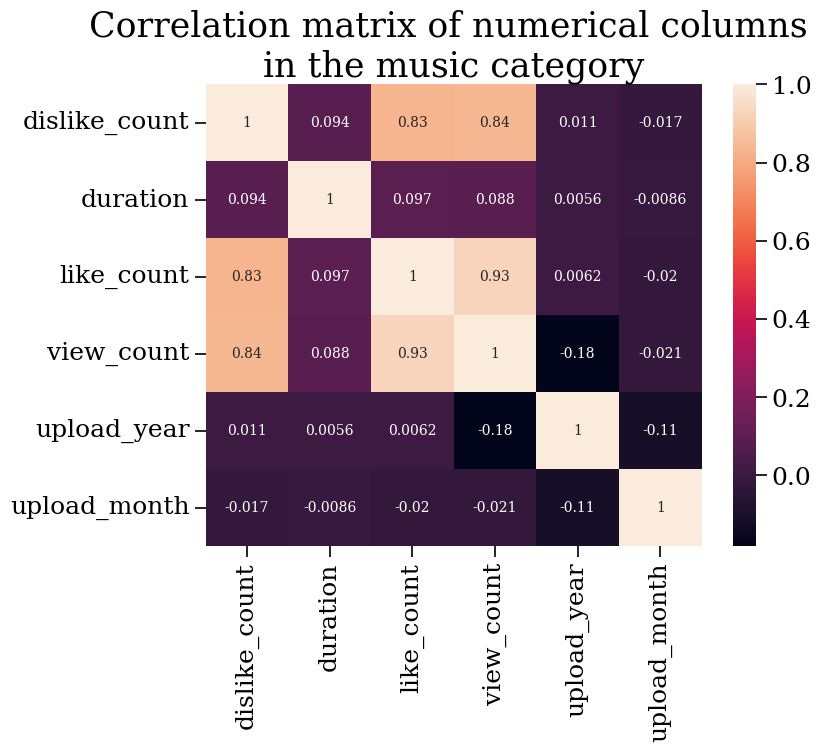

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
crawl_date,datetime64[ns],8305003,2019-11-10 07:38:19.121897216,NaN,2019-10-29 16:47:24.970666,2019-11-03 03:49:33.599728384,2019-11-10 10:16:15.303284992,2019-11-17 10:19:38.244027136,2019-11-23 15:34:17.741614,0,0.000000
dislike_count,float32,8197981.0,108.778442,4077.240723,0.0,0.0,2.0,9.0,4265883.0,107022,1.288645
duration,int32,8305003.0,471.251079,1366.796104,1.0,172.0,230.0,333.0,172919.0,0,0.000000
like_count,float64,8197981.0,2350.635442,50933.245053,0.0,9.0,50.0,268.0,35287325.0,107022,1.288645
upload_date,datetime64[ns],8305003,2016-05-31 16:32:47.446755328,NaN,2005-11-19 00:00:00,2014-10-13 00:00:00,2017-02-02 00:00:00,2018-07-24 00:00:00,2019-11-20 00:00:00,0,0.000000
view_count,float64,8304989.0,298012.099444,9144052.327531,0.0,655.0,3321.0,19364.0,6509934494.0,14,0.000169
categories,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
channel_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
description,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
display_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000


In [49]:
data_utils.get_stats_on_category(df_metadata_music,
                                 type='video_metadata', 
                                 category_name='music', 
                                 corr_method='spearman', 
                                 verbose=False)

In [11]:
categories = ["Music", "Education"]
df_metadata_education = pd.read_parquet(f"{VIDEO_METADATA_PATH}/Education.parquet")

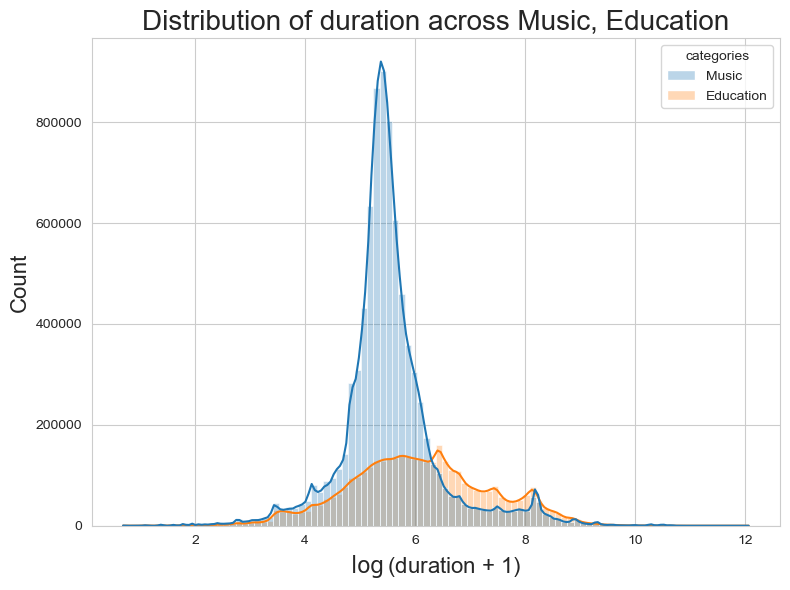

In [13]:
df_metadata_compare =  pd.concat([df_metadata_music, df_metadata_education], axis=0)
data_utils.compare_distribution_across_categories(df_metadata_compare,
                                                  columns=["duration"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[False],
                                                  kind="hist",
                                                  hue="categories")

# 5. Comment Dataset Analysis

In [79]:
df_num_comments = pd.read_csv(f"{DATA_PATH}/num_comments.tsv.gz", sep="\t", compression="gzip")
df_num_comments.sample(3)

,display_id,num_comms
11065715,eRSDvqK6bl8,1.0
315694,QTv6Zj3UDtg,1.0
42397194,pjOTKlRA7Io,171.0


In [80]:
df_num_comments_authors = pd.read_csv(f"{DATA_PATH}/num_comments_authors.tsv.gz", sep="\t", compression="gzip")
df_num_comments_authors.sample(3)

,author,video_id
227082643,291719135,2
7633558,9807570,1
76765248,98619193,2


In [ ]:
# df_youtube_comments = pd.read_csv(f"{DATA_PATH}/youtube_comments.tsv.gz", sep="\t", compression="gzip")
# df_youtube_comments.sample(3)

# 6. 

Top 10 des chaînes avec la plus forte croissance en vues :


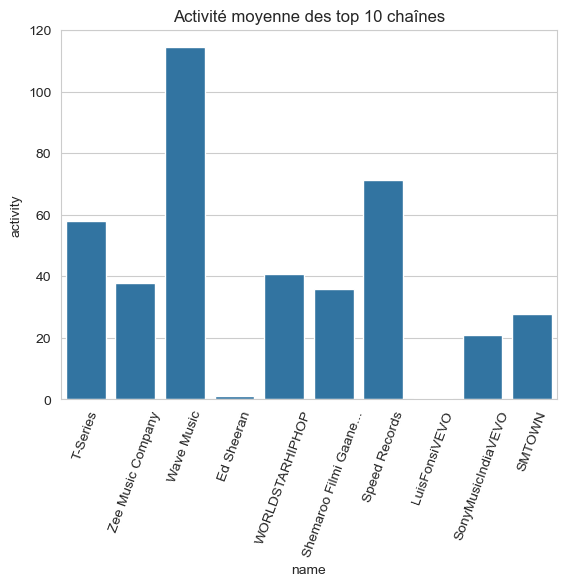

,channel,delta_views,delta_subs,activity,name
20087,UCq-Fj5jknLsUf-MWSy4_brA,7.319445e+10,9.995632e+07,58.135484,T-Series
6006,UCFFbwnve3yF62-tVXkTyHqg,1.849967e+10,4.148868e+07,37.832258,Zee Music Company
1163,UC22nIfOTM7KLIQuFGMKzQbg,1.796978e+10,2.722365e+07,114.393548,Wave Music
452,UC0C-w0YjGpqDXGB8IHb662A,1.494824e+10,3.269731e+07,0.961538,Ed Sheeran
365,UC-yXuc1__OzjwpsJPlxYUCQ,1.381312e+10,1.868545e+07,40.730769,WORLDSTARHIPHOP
9648,UCP6uH_XlsxrXwZQ4DlqbqPg,1.224542e+10,2.667174e+07,35.935484,Shemaroo Filmi Gaane...
9562,UCOsyDsO5tIt-VZ1iwjdQmew,1.173295e+10,2.444421e+07,71.161290,Speed Records
8407,UCLp8RBhQHu9wSsq62j_Md6A,1.061018e+10,1.803257e+07,0.348387,LuisFonsiVEVO
1631,UC3MLnJtqc_phABBriLRhtgQ,1.023601e+10,2.350078e+07,21.083333,SonyMusicIndiaVEVO
5813,UCEf_Bc-KVd7onSeifS3py9g,1.011586e+10,1.087996e+07,27.690323,SMTOWN


In [102]:
# Calcul de la croissance totale en vues et abonnés pour chaque chaîne
total_growth = df_music_time_series.groupby('channel').agg({
    'delta_views': 'sum',
    'delta_subs': 'sum',
    'activity': 'mean'
}).reset_index()

# Sélection des top 10 chaînes en termes de delta_views
top_channels = total_growth.sort_values('delta_views', ascending=False).head(10)

print("Top 10 des chaînes avec la plus forte croissance en vues :")

top_channels["name"] = top_channels["channel"].apply(lambda x: data_utils.get_channel_name(x, df_music_channels))

# Visualisation de l'activité moyenne des top chaînes
sns.barplot(x='name', y='activity', data=top_channels)
plt.title("Activité moyenne des top 10 chaînes")
plt.xticks(rotation=70)
plt.show()

top_channels